In [1]:
# Importando bibliotecas
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from haversine import haversine_vector
import re
from sklearn.impute import KNNImputer

In [2]:
# Leitura dos CSVs
product_df = pd.read_csv('../data/product.csv', sep=';')
product_df['ProviderID'] = pd.to_numeric(product_df['ProviderID'], errors='coerce') # Tranformando para numérico
product_df['CategoryID'] = pd.to_numeric(product_df['CategoryID'], errors='coerce') # Tranformando para numérico

ride_df = pd.read_csv('../data/ride_v2.csv', sep=';')

rideaddress_df = pd.read_csv('../data/rideaddress_v1.csv', sep=';')

rideestimative_df = pd.read_csv('../data/rideestimative_v3.csv', sep=';')

/var/folders/vs/x_q4wlqd1dgfqg6f001zy58c0000gn/T/ipykernel_52650/2409408164.py:8: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  rideaddress_df = pd.read_csv('../data/rideaddress_v1.csv', sep=';')


Merge

In [3]:
# Merge 1: rideestimative + product (via ProductID)
df = pd.merge(rideestimative_df, product_df, on='ProductID', how='left')

# Merge 2: + ride (via RideID)
df = pd.merge(df, ride_df, on='RideID', how='left', suffixes=('', '_ride'))

# Merge 3: + rideaddress (via RideID)
origem_df = rideaddress_df[rideaddress_df['RideAddressTypeID'] == 1]
destino_df = rideaddress_df[rideaddress_df['RideAddressTypeID'] == 2]

df = df.merge(origem_df.add_prefix("origem_"), left_on='RideID', right_on='origem_RideID', how='left')
df = df.merge(destino_df.add_prefix("destino_"), left_on='RideID', right_on='destino_RideID', how='left')


display(df)

,RideEstimativeID,RideID,ProductID,WaitingTime,Price,FareID,Selected,RideReasonSelectedEstimativeID,Fee,ProviderID,...,destino_Address,destino_Street,destino_Number,destino_Neighborhood,destino_City,destino_State,destino_Lat,destino_Lng,destino_RideAddressTypeID,destino_RideID
0,8619946,1183200,Flash,8,89.00,c6aaac64-5f89-4fc4-8b66-0251ec1c78a8,0,NaN,0.0,2,...,"Av. Dr. Nereu Ramos, 450 - Rocio Grande, São F...","Av. Dr. Nereu Ramos, 450 - Rocio Grande, São F...",450,NaN,NaN,NaN,-26.2554657,-48.6434197,2,1183200
1,8619947,1183200,UberX,6,89.00,ff3cc941-93a8-4d0e-a274-bb988576d7d4,0,NaN,0.0,2,...,"Av. Dr. Nereu Ramos, 450 - Rocio Grande, São F...","Av. Dr. Nereu Ramos, 450 - Rocio Grande, São F...",450,NaN,NaN,NaN,-26.2554657,-48.6434197,2,1183200
2,8619948,1183200,Comfort,10,116.50,d7708871-2f2c-447d-81e6-a2d121863a2f,0,NaN,0.0,2,...,"Av. Dr. Nereu Ramos, 450 - Rocio Grande, São F...","Av. Dr. Nereu Ramos, 450 - Rocio Grande, São F...",450,NaN,NaN,NaN,-26.2554657,-48.6434197,2,1183200
3,8619949,1183200,poupa99,5,170.21,NaN,0,NaN,0.0,3,...,"Av. Dr. Nereu Ramos, 450 - Rocio Grande, São F...","Av. Dr. Nereu Ramos, 450 - Rocio Grande, São F...",450,NaN,NaN,NaN,-26.2554657,-48.6434197,2,1183200
4,8619950,1183200,pop99,7,170.21,NaN,0,NaN,0.0,3,...,"Av. Dr. Nereu Ramos, 450 - Rocio Grande, São F...","Av. Dr. Nereu Ramos, 450 - Rocio Grande, São F...",450,NaN,NaN,NaN,-26.2554657,-48.6434197,2,1183200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,10620896,1425244,Black,3,62.00,7a400fa1-e332-4ccc-b081-fa0615ca8c8a,0,NaN,0.0,2,...,"R. Pensilvânia, 114, 114 - R. Pensilvânia, 114...","R. Pensilvânia, 114",114,"R. Pensilvânia, 114, 114",NaN,NaN,-23.6158666,-46.6811017,2,1425244
1999996,10620897,1425244,Bag,10,58.50,c0a6bfa8-a9fd-48a8-9183-7c0dedbf58a2,0,NaN,0.0,2,...,"R. Pensilvânia, 114, 114 - R. Pensilvânia, 114...","R. Pensilvânia, 114",114,"R. Pensilvânia, 114, 114",NaN,NaN,-23.6158666,-46.6811017,2,1425244
1999997,10620898,1425244,Black Bag,3,75.50,c7a42859-5a45-404f-85c9-c5aa1be11d15,0,NaN,0.0,2,...,"R. Pensilvânia, 114, 114 - R. Pensilvânia, 114...","R. Pensilvânia, 114",114,"R. Pensilvânia, 114, 114",NaN,NaN,-23.6158666,-46.6811017,2,1425244
1999998,10620899,1425244,pop99,7,39.56,NaN,0,NaN,0.0,3,...,"R. Pensilvânia, 114, 114 - R. Pensilvânia, 114...","R. Pensilvânia, 114",114,"R. Pensilvânia, 114, 114",NaN,NaN,-23.6158666,-46.6811017,2,1425244


In [4]:
# Exibir cada coluna com seu tipo de dado
for col in df.columns:
    print(f"{col}: {df[col].dtype}")

RideEstimativeID: int64
RideID: int64
ProductID: object
WaitingTime: int64
Price: float64
FareID: object
Selected: int64
RideReasonSelectedEstimativeID: float64
Fee: float64
ProviderID: int64
CategoryID: int64
Description: object
UserID: object
Schedule: object
Create: object
RideStatusID: int64
CompanyID: int64
ProviderID_ride: float64
RideProviderID: object
price: float64
Updated: object
CategoryID_ride: float64
TotalUsers: int64
Car: object
RideDriverLocationID: float64
ScheduledRide: int64
origem_RideAddressID: int64
origem_Address: object
origem_Street: object
origem_Number: object
origem_Neighborhood: object
origem_City: object
origem_State: object
origem_Lat: object
origem_Lng: object
origem_RideAddressTypeID: int64
origem_RideID: int64
destino_RideAddressID: int64
destino_Address: object
destino_Street: object
destino_Number: object
destino_Neighborhood: object
destino_City: object
destino_State: object
destino_Lat: object
destino_Lng: object
destino_RideAddressTypeID: int64
de

## Tratamento dos dados

Conversões

In [5]:
# Tempo
df['Create'] = pd.to_datetime(df['Create'], errors='coerce')
df['Schedule'] = pd.to_datetime(df['Schedule'], errors='coerce')
df['Updated'] = pd.to_datetime(df['Updated'], errors='coerce')

# Latitude e longitude
df['origem_Lat'] = pd.to_numeric(df['origem_Lat'], errors='coerce')
df['destino_Lat'] = pd.to_numeric(df['destino_Lat'], errors='coerce')
df['origem_Lng'] = pd.to_numeric(df['origem_Lng'], errors='coerce')
df['destino_Lng'] = pd.to_numeric(df['destino_Lng'], errors='coerce')

# ID
df['ProviderID_ride'] = df['ProviderID_ride'].fillna(0).astype(int)
df['RideDriverLocationID'] = df['RideDriverLocationID'].fillna(0).astype(int)
df['CategoryID_ride'] = df['CategoryID_ride'].fillna(0).astype(int)

# Bool
df['Selected'] = df['Selected'].astype(bool)
df['ScheduledRide'] = df['ScheduledRide'].astype(bool)

# String
df['ProductID'] = df['ProductID'].astype(str)
df['Description'] = df['Description'].astype(str)

# Float
df['Price'] = df['Price'].astype(float)

# Object
df['origem_Address'] = df['origem_Address'].astype(object)
df['destino_Address'] = df['destino_Address'].astype(object)

Tratamento de nulos

In [6]:
# Verificar a quantidade e porcentagem de nulos por coluna
null_summary = df.isnull().sum().to_frame(name='n_nulos')
null_summary['%_nulos'] = 100 * null_summary['n_nulos'] / len(df)
print(null_summary[null_summary['n_nulos'] > 0].sort_values('%_nulos', ascending=False))

                                n_nulos   %_nulos
Car                             1990625  99.53125
RideProviderID                  1986473  99.32365
RideReasonSelectedEstimativeID  1765979  88.29895
destino_Neighborhood            1746497  87.32485
origem_City                     1446036  72.30180
destino_State                   1016416  50.82080
destino_City                    1009106  50.45530
FareID                           818225  40.91125
origem_Neighborhood              659488  32.97440
origem_State                     496560  24.82800
destino_Number                   413848  20.69240
origem_Number                    291217  14.56085
origem_Street                      3074   0.15370
destino_Street                     3074   0.15370
destino_Lat                         209   0.01045
destino_Lng                         209   0.01045
origem_Lng                            6   0.00030
origem_Lat                            6   0.00030


In [7]:
"""# Gerar uma lista com todas as colunas do DataFrame
lista_colunas = df.columns.tolist()

# Exibir a lista completa
print(lista_colunas)"""

'# Gerar uma lista com todas as colunas do DataFrame\nlista_colunas = df.columns.tolist()\n\n# Exibir a lista completa\nprint(lista_colunas)'

In [8]:
"""for col in ['destino_RideID']:
    print(f"Contagem de valores em {col}:")
    print(df[col].value_counts())"""

'for col in [\'destino_RideID\']:\n    print(f"Contagem de valores em {col}:")\n    print(df[col].value_counts())'

In [9]:
# Lista das colunas para remover
colunas_para_remover = ['Car', # 99.5% Nulo
                  'RideProviderID', # 99.3% Nulo
                  'RideReasonSelectedEstimativeID', # 88.2% Nulo
                  'destino_Neighborhood', # 87.3% Nulo - Endereço completo
                  'FareID', # Difícil entendimento
                  'origem_Neighborhood', # Endereço completo
                  'destino_Number', # Número
                  'origem_Number', # Número
                  'price', # Não podemos usar
                  'RideDriverLocationID', # Mais 90% dos valores nulos
                  'ScheduledRide' # Valores iguais
]

# Remover as colunas do DataFrame
df.drop(columns=colunas_para_remover, inplace=True)

## Tratamento

Coluna State

In [10]:
# Criar tabela com os limites de latitude e longitude dos estados
estados_coords = pd.DataFrame({
    'state': ['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO'],
    'lat_min': [-11.0, -10.5, 0.0, -10.0, -18.0, -8.0, -16.0, -21.0, -19.5, -9.0, -17.0, -24.0, -21.0, -9.0, -8.0, -26.0, -9.5, -10.0, -23.0, -6.0, -33.0, -14.0, 0.0, -29.0, -25.0, -11.5, -13.0],
    'lat_max': [-7.0, -8.0, 5.0, 3.0, -8.0, -2.0, -15.0, -18.0, -12.0, -1.0, -8.0, -17.0, -14.0, 2.0, -6.0, -22.0, -7.0, -2.0, -20.0, -4.0, -28.0, -8.0, 5.0, -26.0, -20.0, -10.0, -5.0],
    'lng_min': [-74.0, -38.5, -54.0, -70.0, -46.0, -41.0, -48.0, -41.0, -52.0, -47.0, -61.0, -58.0, -48.0, -55.0, -38.0, -54.0, -42.0, -45.0, -44.0, -38.5, -57.0, -66.0, -63.0, -54.0, -50.0, -38.0, -50.0],
    'lng_max': [-66.0, -35.0, -50.0, -56.0, -37.0, -37.0, -47.0, -39.0, -46.0, -42.0, -52.0, -52.0, -39.0, -47.0, -34.0, -48.0, -34.0, -40.0, -40.0, -35.0, -49.0, -60.0, -60.0, -48.0, -44.0, -36.5, -45.0]
})

# Função para mapear coordenadas diretamente aos estados
def mapear_estado(df, lat_col, lng_col, estados_coords):
    # Criar condição vetorizada para mapear as coordenadas
    conditions = [
        (df[lat_col].between(estados_coords.iloc[i]['lat_min'], estados_coords.iloc[i]['lat_max']) &
         df[lng_col].between(estados_coords.iloc[i]['lng_min'], estados_coords.iloc[i]['lng_max']))
        for i in range(len(estados_coords))
    ]
    # Mapear estado com base na condição
    estados = estados_coords['state'].values
    return np.select(conditions, estados, default=None)

# Aplicar o mapeamento para origem e destino
df['origem_State'] = mapear_estado(df, 'origem_Lat', 'origem_Lng', estados_coords)
df['destino_State'] = mapear_estado(df, 'destino_Lat', 'destino_Lng', estados_coords)

In [11]:
# Preenchendo os valores nulos de origem_State e destino_State com o Address
df['origem_State'] = df['origem_State'].fillna(df['origem_Address'])
df['destino_State'] = df['destino_State'].fillna(df['destino_Address'])

# Função para extrair UF do texto
def extrair_estado(origem):
    if pd.notnull(origem):
        if '-' in origem:  # Verifica se há um traço indicando um endereço
            partes = origem.split('-')  # Divide o texto pelo traço
            for parte in partes:  # Itera sobre as partes divididas
                if len(parte.strip()) == 2 and parte.strip().isalpha():  # Verifica formato UF
                    return parte.strip()  # Retorna o estado (UF)
        elif len(origem.strip()) == 2 and origem.isalpha():  # Já está no formato UF
            return origem.strip()
    return None  # Retorna None se não for encontrado

# Aplicando a função para limpar os dados de origem_State
df['origem_State'] = df['origem_State'].apply(extrair_estado)
df['destino_State'] = df['destino_State'].apply(extrair_estado)

In [12]:
# Verificar a quantidade e porcentagem de nulos por coluna
null_summary = df.isnull().sum().to_frame(name='n_nulos')
null_summary['%_nulos'] = 100 * null_summary['n_nulos'] / len(df)
print(null_summary[null_summary['n_nulos'] > 0].sort_values('%_nulos', ascending=False))

                n_nulos   %_nulos
origem_City     1446036  72.30180
destino_City    1009106  50.45530
origem_State      12988   0.64940
destino_State      9280   0.46400
origem_Street      3074   0.15370
destino_Street     3074   0.15370
destino_Lat         209   0.01045
destino_Lng         209   0.01045
origem_Lat            6   0.00030
origem_Lng            6   0.00030


City

In [13]:
# Preencher City com a moda (valor mais frequente) dentro de cada State
df['origem_City'] = df.groupby('origem_State')['origem_City'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)
df['destino_City'] = df.groupby('destino_State')['destino_City'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

In [14]:
# Verificar a quantidade e porcentagem de nulos por coluna
null_summary = df.isnull().sum().to_frame(name='n_nulos')
null_summary['%_nulos'] = 100 * null_summary['n_nulos'] / len(df)
print(null_summary[null_summary['n_nulos'] > 0].sort_values('%_nulos', ascending=False))

                n_nulos  %_nulos
origem_City       12988  0.64940
origem_State      12988  0.64940
destino_City       9280  0.46400
destino_State      9280  0.46400
origem_Street      3074  0.15370
destino_Street     3074  0.15370
destino_Lat         209  0.01045
destino_Lng         209  0.01045
origem_Lat            6  0.00030
origem_Lng            6  0.00030


In [15]:
# Substituir valores nulos por 'Desconhecido' 
df['origem_City'] = df['origem_City'].fillna('Desconhecido')
df['origem_State'] = df['origem_State'].fillna('Desconhecido')
df['destino_State'] = df['destino_State'].fillna('Desconhecido')
df['destino_City'] = df['destino_City'].fillna('Desconhecido')
df['origem_Street'] = df['origem_Street'].fillna('Desconhecido')
df['destino_Street'] = df['destino_Street'].fillna('Desconhecido')

Lng e Lat

In [16]:

# Selecionar apenas as colunas de coordenadas
coordenadas = df[['origem_Lat', 'origem_Lng', 'destino_Lat', 'destino_Lng']]

# Criar o imputador KNN
imputer = KNNImputer(n_neighbors=5)  # Usa 5 vizinhos para imputação

# Aplicar o imputador
coordenadas_imputadas = imputer.fit_transform(coordenadas)

# Atualizar o DataFrame original com as coordenadas preenchidas
df[['origem_Lat', 'origem_Lng', 'destino_Lat', 'destino_Lng']] = coordenadas_imputadas

In [17]:
# Verificar a quantidade e porcentagem de nulos por coluna
null_summary = df.isnull().sum().to_frame(name='n_nulos')
null_summary['%_nulos'] = 100 * null_summary['n_nulos'] / len(df)
print(null_summary[null_summary['n_nulos'] > 0].sort_values('%_nulos', ascending=False))

Empty DataFrame
Columns: [n_nulos, %_nulos]
Index: []


Engenharia de Feature

In [18]:
# Gerar uma lista com todas as colunas do DataFrame
lista_colunas = df.columns.tolist()

# Exibir a lista completa
print(lista_colunas)

['RideEstimativeID', 'RideID', 'ProductID', 'WaitingTime', 'Price', 'Selected', 'Fee', 'ProviderID', 'CategoryID', 'Description', 'UserID', 'Schedule', 'Create', 'RideStatusID', 'CompanyID', 'ProviderID_ride', 'Updated', 'CategoryID_ride', 'TotalUsers', 'origem_RideAddressID', 'origem_Address', 'origem_Street', 'origem_City', 'origem_State', 'origem_Lat', 'origem_Lng', 'origem_RideAddressTypeID', 'origem_RideID', 'destino_RideAddressID', 'destino_Address', 'destino_Street', 'destino_City', 'destino_State', 'destino_Lat', 'destino_Lng', 'destino_RideAddressTypeID', 'destino_RideID']


In [19]:
# Verificar diferença absoluta entre os campos (em segundos)
df['delta_schedule_create'] = (df['Schedule'] - df['Create']).dt.total_seconds().abs() #Tempo absoluto entre o agendamento e a criação da corrida.
df['delta_schedule_updated'] = (df['Schedule'] - df['Updated']).dt.total_seconds().abs() #Tempo absoluto entre o agendamento e a última atualização.
df['delta_create_updated'] = (df['Create'] - df['Updated']).dt.total_seconds().abs() #Tempo absoluto entre a criação e a última atualização.

In [20]:
# Feature: Tempo de antecedência da corrida
df["lead_time"] = (df["Schedule"] - df["Create"]).dt.total_seconds() / 60.0 #Tempo entre criação e agendamento da corrida, já transformado em minutos.

# Feature: Dia da semana e hora do dia
df["weekday"] = df["Create"].dt.weekday #(0 = segunda-feira, 6 = domingo)
df["hour"] = df["Create"].dt.hour #Hora do dia da corrida

# Manhã, Tarde, Noite ou Madrugada
def periodo_do_dia(hour):
    if 5 <= hour < 12:
        return 0
    elif 12 <= hour < 18:
        return 1
    elif 18 <= hour < 23:
        return 2
    else:
        return 3

df["periodo"] = df["hour"].apply(periodo_do_dia) 

# Feature: Identificar se o horário da corrida é de pico
# 1 para horários de pico (7-9h ou 17-19h), 0 caso contrário
df["horario_pico"] = df["hour"].apply(lambda x: 1 if (7 <= x <= 9 or 17 <= x <= 19) else 0)

# Feature: Identificar se é fim de semana
df["fim_de_semana"] = df["weekday"].apply(lambda x: 1 if x >= 5 else 0)

In [21]:
# Criar arrays de coordenadas
coords_origem = np.column_stack((df["origem_Lat"], df["origem_Lng"]))
coords_destino = np.column_stack((df["destino_Lat"], df["destino_Lng"]))

# Calcular distâncias utilizando vetorização
df["distance_km"] = haversine_vector(coords_origem, coords_destino, unit='km')

In [22]:
"""df['distance_km_log'] = np.log1p(df['distance_km'])  # Logaritmo natural de distance_km (para normalização).
df['lead_time_log'] = np.log1p(df['lead_time'])      # Logaritmo natural de lead_time (para normalização)."""

"df['distance_km_log'] = np.log1p(df['distance_km'])  # Logaritmo natural de distance_km (para normalização).\ndf['lead_time_log'] = np.log1p(df['lead_time'])      # Logaritmo natural de lead_time (para normalização)."

In [23]:
# Distância ajustada por horário de pico
df['distance_pico'] = df['distance_km'] * df['horario_pico']

In [24]:
# Fim de semana * horário de pico
df["week_pico"] = df["weekday"] * df["horario_pico"]

In [25]:
# Calcular o tempo gasto (em segundos)
df['travel_time_seconds'] = (pd.to_datetime(df['Updated']) - pd.to_datetime(df['Create'])).dt.total_seconds()

# Calcular velocidade média (km/h)
df['speed_kmh'] = (df['distance_km'] / (df['travel_time_seconds'] / 3600)).round(2)

# Criar indicador de trânsito
conditions = [
    df['speed_kmh'] > 40,  # Trânsito leve
    (df['speed_kmh'] <= 40) & (df['speed_kmh'] >= 20),  # Trânsito moderado
    df['speed_kmh'] < 20  # Trânsito pesado
]
choices = [0, 1, 2]  # Leve, Moderado, Pesado
df['traffic_indicator'] = np.select(conditions, choices, default=-1)

In [26]:
# Relação distância-tempo: Identifica eficiência ou padrões de trânsito.
df['distance_time_ratio'] = df['distance_km'] / (df['travel_time_seconds'] / 3600)  # km/h

In [27]:
# Lead time em relação ao tempo total da viagem:
df['lead_time_ratio'] = df['lead_time'] / (df['travel_time_seconds'] / 60)

In [28]:
# Viagens por hora do dia
df['trips_per_hour'] = df.groupby('hour')['RideID'].transform('count')

In [29]:
# Viagens por dia da semana
df['trips_per_weekday'] = df.groupby('weekday')['RideID'].transform('count')

In [30]:
# Analise diferenças entre os estados ou cidades de origem e destino. Isso pode ajudar a identificar viagens intermunicipais ou de longa distância.
df['same_city'] = (df['origem_City'] == df['destino_City']).astype(int)
df['same_state'] = (df['origem_State'] == df['destino_State']).astype(int)

In [31]:
df['month'] = df['Create'].dt.month
df['season'] = df['month'].apply(lambda x: 0 if x in [12, 1, 2] else (1 if x in [3, 4, 5] else (2 if x in [6, 7, 8] else 3)))
# 0 = Verão, 1 = Outono, 2 = Inverno, 3 = Primavera (no hemisfério sul)

In [32]:
# Distância ajustada ao trânsito
df['effective_distance'] = df['distance_km'] * (1 + (df['traffic_indicator'] / 10))  # Penaliza trânsito pesado

In [33]:
# Distância ponderada por tempo de viagem:
df['distance_time_efficiency'] = df['distance_km'] / (df['travel_time_seconds'] / 3600)

In [34]:
# Velocidade ajustada por horário de pico
df['adjusted_speed_pico'] = df['speed_kmh'] * (1 + df['horario_pico'])

In [35]:
# Lista das colunas para remover
colunas_para_remover = ['ProviderID_ride', 
                  'CategoryID_ride', 
]

# Remover as colunas do DataFrame
df.drop(columns=colunas_para_remover, inplace=True)

In [36]:
display(df)

,RideEstimativeID,RideID,ProductID,WaitingTime,Price,Selected,Fee,ProviderID,CategoryID,Description,...,lead_time_ratio,trips_per_hour,trips_per_weekday,same_city,same_state,month,season,effective_distance,distance_time_efficiency,adjusted_speed_pico
0,8619946,1183200,Flash,8,89.00,False,0.0,2,10,Flash,...,-0.001842,186193,330621,0,1,8,2,21.306472,9802.059812,9802.06
1,8619947,1183200,UberX,6,89.00,False,0.0,2,2,UberX,...,-0.001842,186193,330621,0,1,8,2,21.306472,9802.059812,9802.06
2,8619948,1183200,Comfort,10,116.50,False,0.0,2,9,Comfort,...,-0.001842,186193,330621,0,1,8,2,21.306472,9802.059812,9802.06
3,8619949,1183200,poupa99,5,170.21,False,0.0,3,2,99POUPA,...,-0.001842,186193,330621,0,1,8,2,21.306472,9802.059812,9802.06
4,8619950,1183200,pop99,7,170.21,False,0.0,3,2,99POP,...,-0.001842,186193,330621,0,1,8,2,21.306472,9802.059812,9802.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,10620896,1425244,Black,3,62.00,False,0.0,2,4,Black,...,-0.003972,100706,330621,0,1,6,2,8.237544,2021.786630,2021.79
1999996,10620897,1425244,Bag,10,58.50,False,0.0,2,9,Bag,...,-0.003972,100706,330621,0,1,6,2,8.237544,2021.786630,2021.79
1999997,10620898,1425244,Black Bag,3,75.50,False,0.0,2,8,Black Bag,...,-0.003972,100706,330621,0,1,6,2,8.237544,2021.786630,2021.79
1999998,10620899,1425244,pop99,7,39.56,False,0.0,3,2,99POP,...,-0.003972,100706,330621,0,1,6,2,8.237544,2021.786630,2021.79


## Checagem final

In [37]:
print("Valores únicos em origem_City:")
print(df['origem_Lat'].unique())

print("Valores únicos em destino_Lat:")
print(df['destino_Lat'].unique())

print("Valores únicos em origem_Lng:")
print(df['origem_Lng'].unique())

print("Valores únicos em destino_Lng:")
print(df['destino_Lng'].unique())

Valores únicos em origem_City:
[-26.3297543 -27.4919788 -19.8495799 ... -23.5487549 -23.5488482
 -23.5486518]
Valores únicos em destino_Lat:
[-26.2554657 -27.4371486 -19.936899  ... -23.4854582 -23.4368721
 -23.5058317]
Valores únicos em origem_Lng:
[-48.840428  -48.528288  -44.019916  ... -46.7149099 -46.7149299
 -46.7150898]
Valores únicos em destino_Lng:
[-48.6434197 -48.3982431 -43.9401603 ... -46.714238  -46.7290191
 -46.7265643]


In [38]:
print("Proporção em origem_State:")
print(df['origem_State'].value_counts(normalize=True))

Proporção em origem_State:
origem_State
SP              0.445848
RJ              0.112651
MG              0.085414
PR              0.071684
RS              0.052008
GO              0.038179
BA              0.029639
SC              0.028285
DF              0.025614
MS              0.015603
AM              0.013704
CE              0.011801
ES              0.011126
PE              0.009390
PB              0.007500
MA              0.006903
AL              0.006888
Desconhecido    0.006494
RN              0.005740
MT              0.005106
PA              0.004074
AP              0.002871
AC              0.002720
TO              0.000752
BR              0.000005
SE              0.000002
Name: proportion, dtype: float64


In [39]:
inconsistencias = df.groupby('origem_State')['origem_City'].nunique()
print("Número de cidades únicas por estado:")
print(inconsistencias)

Número de cidades únicas por estado:
origem_State
AC                1
AL                9
AM                6
AP                2
BA               33
BR                1
CE               30
DF                9
Desconhecido      1
ES               13
GO               31
MA                4
MG               52
MS                5
MT                6
PA               11
PB               12
PE               16
PR              101
RJ               76
RN               10
RS              100
SC               39
SE                1
SP              379
TO                1
Name: origem_City, dtype: int64


/Users/hellenrosa/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


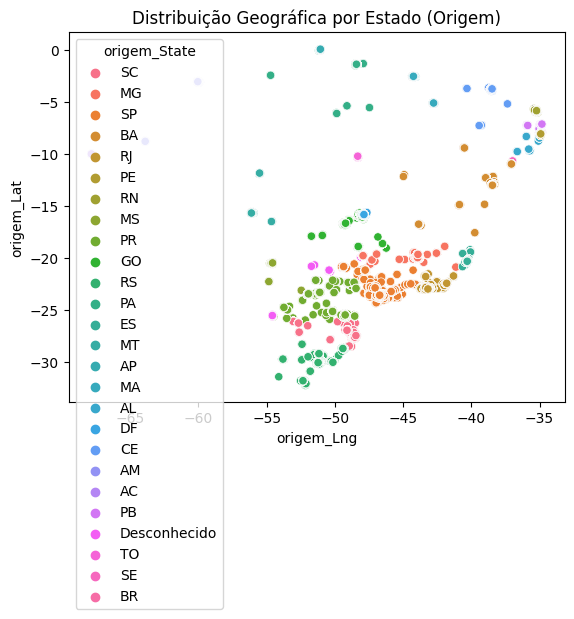

In [40]:
sns.scatterplot(x='origem_Lng', y='origem_Lat', hue='origem_State', data=df)
plt.title('Distribuição Geográfica por Estado (Origem)')
plt.show()

In [41]:
# Salvar CSV limpo
os.makedirs('../data_final', exist_ok=True)
df.to_csv('../data_final/data.csv', index=False)

print("\n✅ CSV limpo salvo com sucesso em: ../data_final/data.csv")


✅ CSV limpo salvo com sucesso em: ../data_final/data.csv
